In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [181]:
Train_df = pd.read_csv('train.csv')
Test_df = pd.read_csv('test.csv')

In [182]:
pd.set_option('display.max_columns',None)
Train_df.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900


In [183]:
Test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [184]:
print(f"Train data set shape : {Train_df.shape}")
print(f"Test Data Set Shape: {Test_df.shape}")

Train data set shape : (1460, 81)
Test Data Set Shape: (1459, 80)


In [185]:
Train_ID = Train_df['Id']
Test_ID = Test_df['Id']

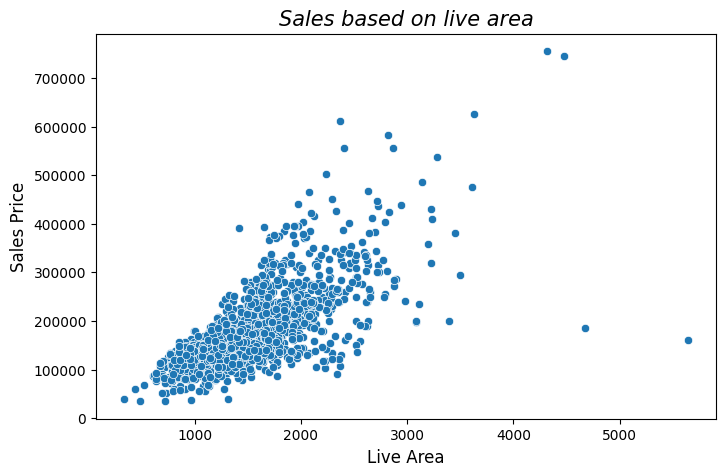

In [186]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=Train_df['GrLivArea'],y=Train_df['SalePrice'])
plt.title("Sales based on live area",fontsize=15,fontstyle='italic')
plt.xlabel("Live Area",fontsize=12)
plt.ylabel("Sales Price",fontsize=12)
plt.show()

In [187]:
Clean_Data_Set = Train_df.drop(Train_df[(Train_df['GrLivArea']>4000) & (Train_df['SalePrice']>400000)].index,axis=0)

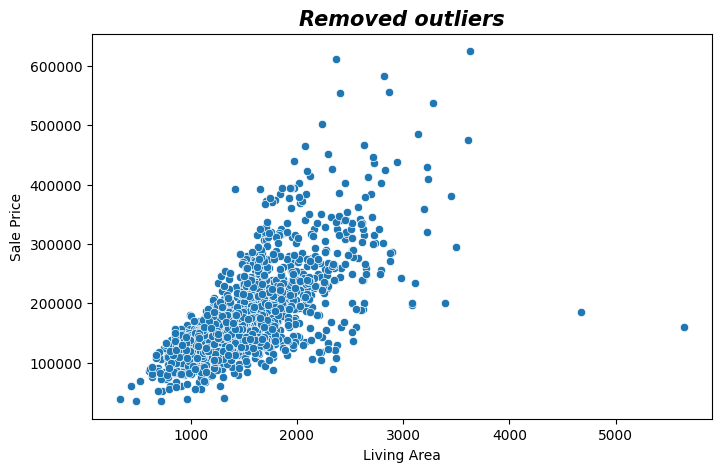

In [188]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=Clean_Data_Set['GrLivArea'],y=Clean_Data_Set['SalePrice'])
plt.title("Removed outliers",fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel("Living Area",fontsize=10)
plt.ylabel("Sale Price",fontsize=10)
plt.show()

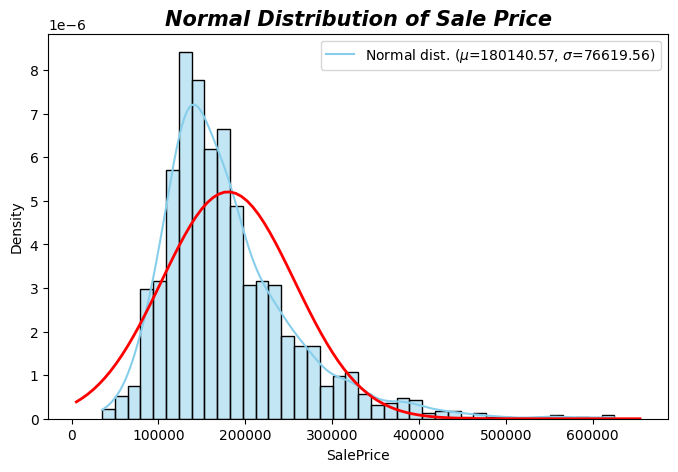

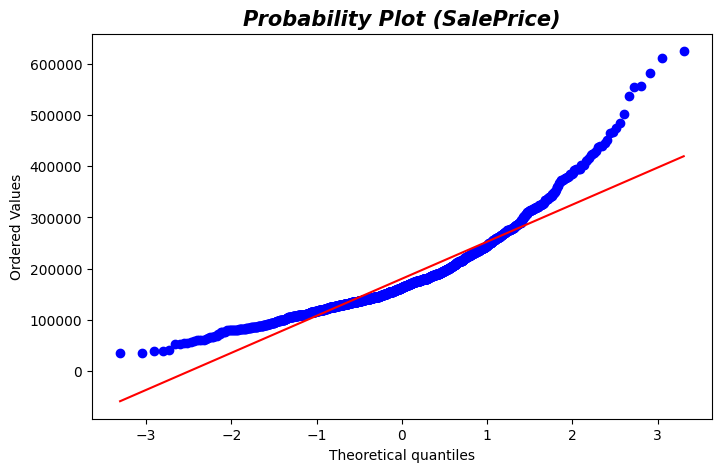

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

plt.figure(figsize=(8,5))
sns.histplot(Clean_Data_Set['SalePrice'], kde=True, stat="density", color='skyblue')

(mu, sigma) = norm.fit(Clean_Data_Set['SalePrice'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)

plt.legend([r'Normal dist. ($\mu$={:.2f}, $\sigma$={:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel("Density", fontsize=10)
plt.title("Normal Distribution of Sale Price", fontweight='bold', fontsize=15, fontstyle='italic')
plt.show()

plt.figure(figsize=(8,5))
stats.probplot(Clean_Data_Set['SalePrice'], dist="norm", plot=plt)
plt.title("Probability Plot (SalePrice)", fontweight='bold', fontsize=15, fontstyle='italic')
plt.show()

 mu = {:.2f} .format(mu)


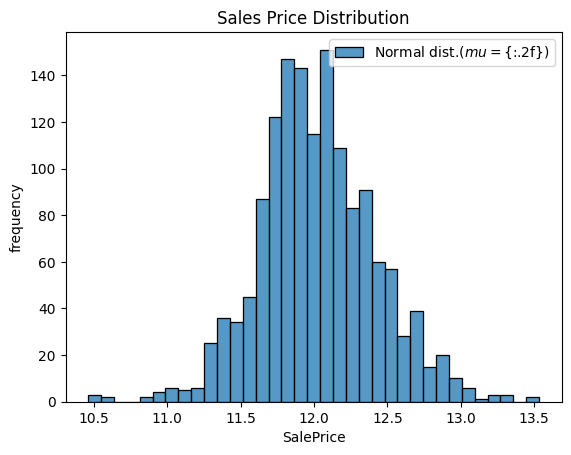

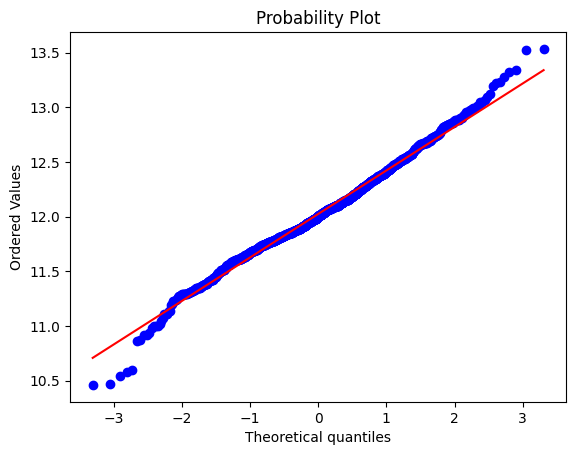

In [190]:
Train_df['SalePrice']= np.log1p(Train_df['SalePrice'])
sns.histplot(data=Train_df['SalePrice'])
mu = norm.fit(Train_df['SalePrice'])
print(' mu = {:.2f} .format(mu)')
plt.legend(['Normal dist.($mu=${:.2f})'])
plt.ylabel('frequency')
plt.title('Sales Price Distribution')
fig = plt.figure()
res = stats.probplot(Train_df['SalePrice'],plot=plt)
plt.show()

In [191]:
Duplicate_Train = Train_df.shape[0]
Duplicate_Test = Test_df.shape[0]
y_train = Train_df.SalePrice.values
All_data = pd.concat((Train_df,Test_df)).reset_index(drop=True)

In [192]:
pd.set_option('Display.max_rows',None)
All_Data_Na = (All_data.isnull().sum() / len(All_data))*100
All_Data_Data_Na = All_Data_Na.drop(All_Data_Na[All_Data_Na==0].index).sort_values(ascending=False)[:30]
Missing_Data = pd.DataFrame({"Missing Ratio":All_Data_Na})
Missing_Data.head(20)

,Missing Ratio
Id,0.000000
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517


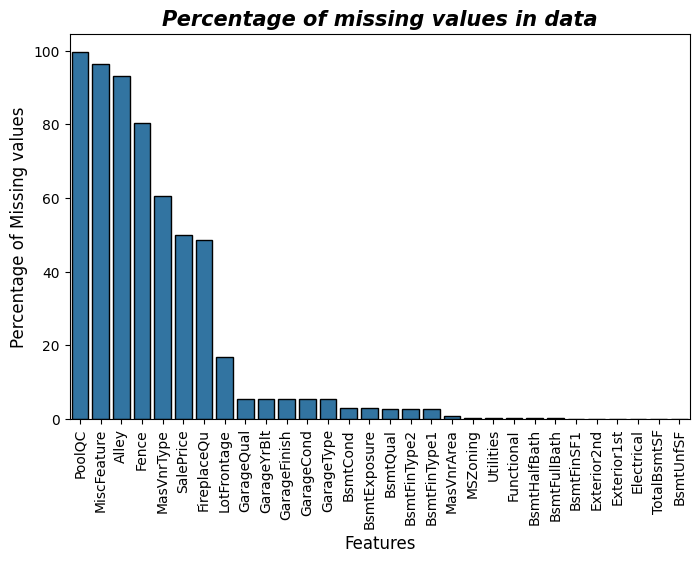

In [193]:
plt.figure(figsize=(8,5))
sns.barplot(x=All_Data_Data_Na.index,y=All_Data_Data_Na,edgecolor='black')
plt.title("Percentage of missing values in data",fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel("Features",fontsize=12)
plt.ylabel("Percentage of Missing values",fontsize=12)
plt.xticks(rotation=90)
plt.show()

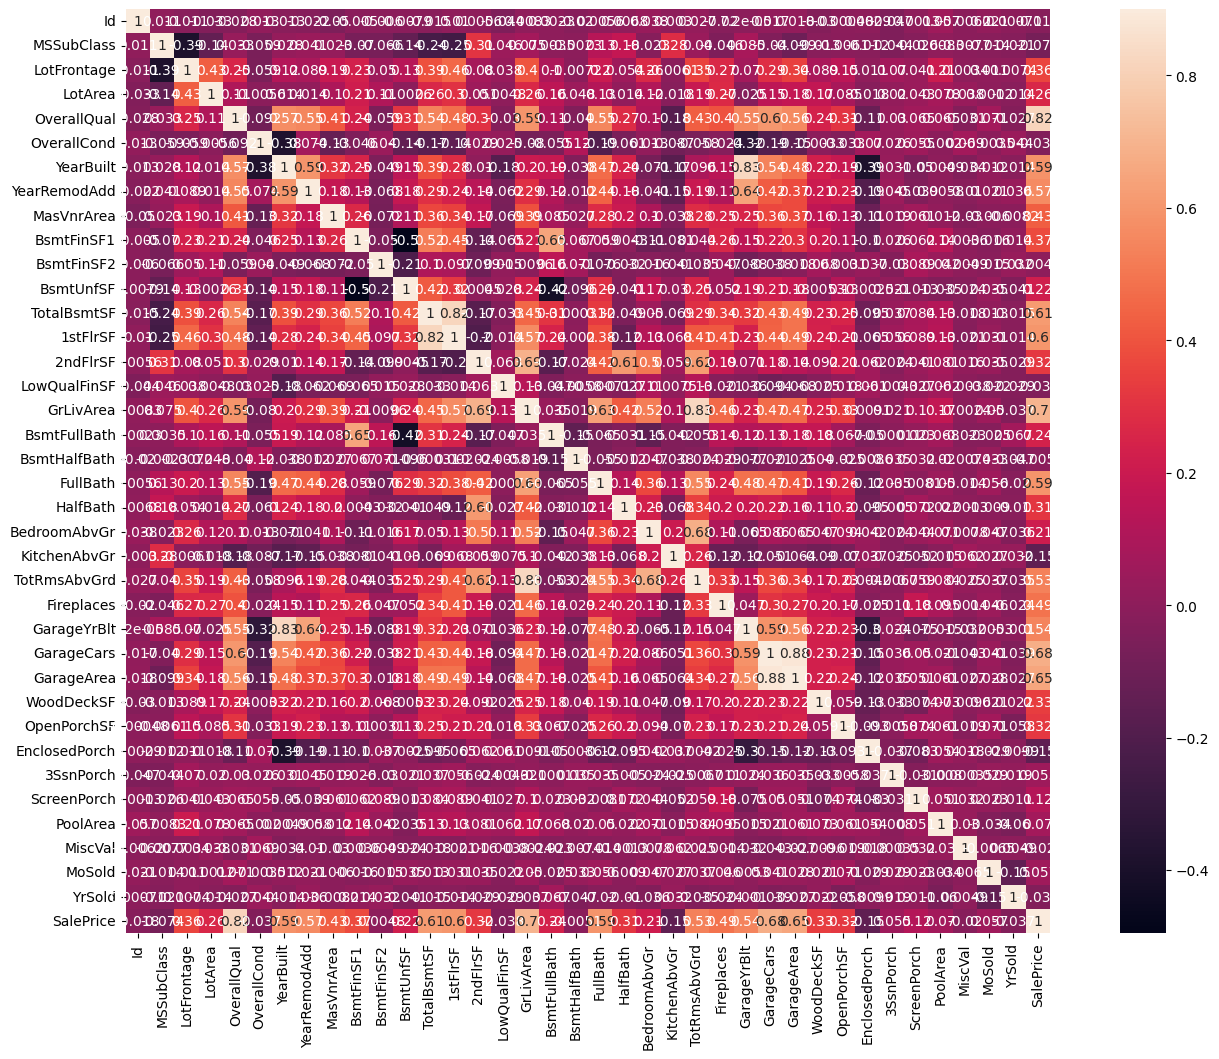

In [194]:
Correlation_Map = Train_df.select_dtypes(include=[np.number])
Correlation_Map = Correlation_Map.corr()
plt.figure(figsize=(18,12))
sns.heatmap(data=Correlation_Map,vmax=0.9,annot=True,square=True)
plt.show()

In [195]:
for col in ('MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
  All_data[col] = All_data[col].fillna('None')

In [196]:
All_data['LotFrontage'] = All_data.groupby("Neighborhood")['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [197]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    All_data[col] = All_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    All_data[col] = All_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    All_data[col] = All_data[col].fillna('None')
All_data["MasVnrType"] = All_data["MasVnrType"].fillna("None")
All_data["MasVnrArea"] = All_data["MasVnrArea"].fillna(0)
All_data['MSZoning'] = All_data['MSZoning'].fillna(All_data['MSZoning'].mode()[0])
All_data["Functional"] = All_data["Functional"].fillna("Typ")
All_data['Electrical'] = All_data.fillna({'Electrical':All_data['Electrical'].mode()[0]},axis=0,inplace=True)
All_data['KitchenQual'] = All_data.fillna({'KitchenQual':All_data['KitchenQual'].mode()[0]},axis=0,inplace=True)
All_data['Exterior1st'] = All_data.fillna({'Exterior1st':All_data['Exterior1st'].mode()[0]},axis=0,inplace=True)
All_data['Exterior2nd'] = All_data.fillna({'Exterior2nd':All_data['Exterior2nd'].mode()[0]},axis=0,inplace=True)
All_data['SaleType'] = All_data.fillna({'SaleType':All_data['SaleType'].mode()[0]},axis=0,inplace=True)
All_data['MSSubClass'] = All_data['MSSubClass'].fillna("None")

In [198]:
All_Data_Na = (All_Data_Data_Na.isnull().sum() / len(All_data))*100
All_Data_Data_Na = All_Data_Data_Na.drop(All_Data_Data_Na[All_Data_Data_Na==0].index).sort_values(ascending=False)
Missing_Data = pd.DataFrame({'Missing Ratio':All_Data_Data_Na})
Missing_Data.head()

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
MasVnrType,60.500171


In [199]:
#MSSubClass=The building class
All_data['MSSubClass'] = All_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
All_data['OverallCond'] = All_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
All_data['YrSold'] = All_data['YrSold'].astype(str)
All_data['MoSold'] = All_data['MoSold'].astype(str)

In [200]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
for c in cols:
  lbe = LabelEncoder()
  lbe.fit(list(All_data[c].values))
  All_data[c] = lbe.transform(list(All_data[c].values))
print("Shape all_data: {}".format(All_data.shape))

Shape all_data: (2919, 81)


In [201]:
All_data['Tsqft'] = All_data['TotalBsmtSF'] + All_data['1stFlrSF'] + All_data['2ndFlrSF']

In [202]:
Numeric_Cols = All_data.dtypes[All_data.dtypes!='object'].index
Skewedfeats = All_data[Numeric_Cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\n Skewness for numerical features\n")
SkewNess = pd.DataFrame({'Skew':Skewedfeats})
SkewNess.head(80)


 Skewness for numerical features



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [203]:
SkewNess = SkewNess[abs(SkewNess)>0.75]
print(f"Skwed Numerical Features: {SkewNess.shape}")
from scipy.special import boxcox1p
skewed_features = SkewNess.index
lam = 0.15
for feat in skewed_features:
  All_data[feat] = boxcox1p(All_data[feat],lam)

Skwed Numerical Features: (61, 1)


In [204]:
All_data = pd.get_dummies(All_data)
print(All_data.shape)

(2919, 180)


In [205]:
Train = All_data[:Duplicate_Train]
Test = All_data[:Duplicate_Test:]

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [221]:
X = All_data[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold']]
Y = All_data['SalePrice']

In [222]:
All_data.fillna({'SalePrice':All_data['SalePrice'].mean()},axis=0,inplace=True)

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

In [224]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [225]:
y_pred = model.predict(X_test)

In [228]:
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R_score = r2_score(y_test,y_pred)
print(f"Mean Squarred Error: {MSE}")
print(f"Mean Absolute Error: {MAE}")
print(f"Root Mean Squarred Error: {RMSE}")
print(f"R_Square: {R_score}")

Mean Squarred Error: 0.000780364138505261
Mean Absolute Error: 0.01971099228653149
Root Mean Squarred Error: 0.027934998451857145
R_Square: 0.2626727296667404
